# S9 Agrupamiento de datos en Python

## Resumen
En esta actividad de laboratorio, aprenderemos a realizar agrupamiento de datos utilizando el conjunto de datos iris. El conjunto de datos iris es ampliamente utilizado para demostrar técnicas de agrupamiento debido a su simplicidad y disponibilidad en la biblioteca Scikit-learn de Python. El objetivo es agrupar las muestras de iris en diferentes clases o grupos basados en sus características.



# Paso 1: Preparación del entorno de trabajo

1. Abre tu entorno de desarrollo de Python preferido (por ejemplo, Jupyter Notebook, VS Code, Copilot).

2. Asegúrate de tener instalada la biblioteca Scikit-learn en tu entorno. Puedes instalarla ejecutando el siguiente comando en la terminal o el símbolo del sistema:

    `pip install scikit-learn`

## Paso 2: Importar las bibliotecas necesarias


In [2]:
#visualization of data
import matplotlib.pyplot as plt
import numpy as np
# plotting a scatter matrix
from pandas.plotting import scatter_matrix
import pandas as pd
# import KMeans
from sklearn.cluster import KMeans 

## Paso 3: Cargar el conjunto de datos iris

In [3]:
#load iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
# store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target
# store the feature and target names
feature_names = iris.feature_names
target_names = iris.target_names
# printing features and target names of our dataset
print("Feature names:", feature_names)
print("Target names:", target_names)
# X and y are numpy arrays
print("\nType of X is:", type(X))
# printing first 5 input rows
print("\nFirst 5 rows of X:\n", X[:5])



Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

Type of X is: <class 'numpy.ndarray'>

First 5 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## Paso 4: Examinar el dataset

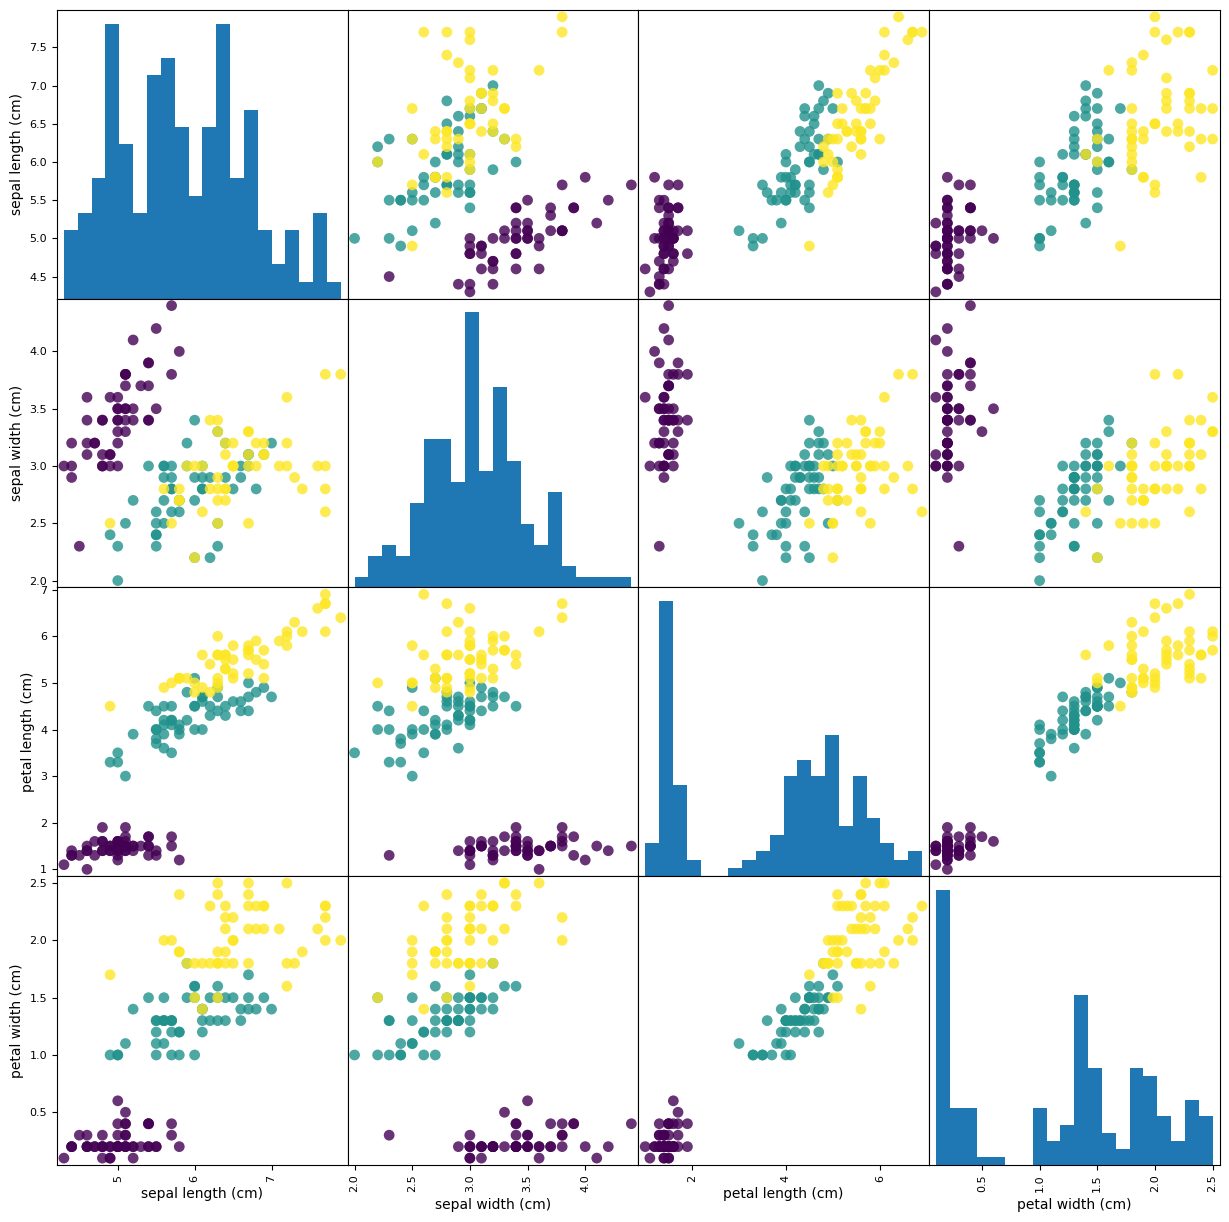

In [4]:
# examining the dataset
# create dataframe from data in X and target in y
# label the columns using the strings in iris_dataset.feature_names
iris_df = pd.DataFrame(X, columns=feature_names)
# create a scatter matrix from the dataframe, color by y
grr = scatter_matrix(iris_df, c=y, figsize=(15, 15), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()


## Paso 5: Aplicar agrupamiento utilizando el algoritmo K-means

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


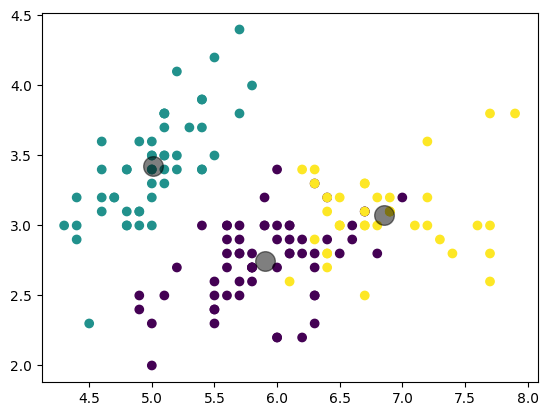

In [5]:
# K-Means Clustering
# apply k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)   # fitting the model
y_pred = kmeans.predict(X)   # predicting the labels



## Paso 6: Evaluar el rendimiento del agrupamiento

In [6]:
y   # true labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
y_pred   # predicted labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Los valores asignados a los grupos encontrados no coinciden exactamente con las etiquetas de Iris. Esto es esperable, ya que el algoritmo k-means nunca tuvo acceso a los valores de las etiquetas originales del conjunto de datos.

Por esta razón, es necesario hacer un ajuste de los valores para que coincidan con los de iris y así  evaluar posteriormente usando diversas métricas.

In [8]:
# change 1 to 0, 0 to 1, 2 to 2 in predicted labels
y_hat = np.zeros_like(y_pred)
y_hat[y_pred == 1] = 0
y_hat[y_pred == 0] = 1
y_hat[y_pred == 2] = 2
y_pred=y_hat
#deleting variable y_hat
del y_hat # no longer needed

la variable `y_hat` Sólo se utilizó temporalmente para copiar los valores de una clase a otra. Después de este cambio, se opta por eliminar la variable para no generar confusiones en el código más abajo.

In [9]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)


[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]



La matriz de confusion muestra que de un total de 150 flores, hubo 16 casos en los que el resultado no fue correcto o falló. La exactitud se calcula dividiendo el número de casos correctos (134) entre el número total de casos (150), lo que da como resultado un porcentaje de exactitud del 89.33%. Esto indica que el método o modelo utilizado tuvo un nivel de precisión del 89.33% al clasificar las flores correctamente.

In [10]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)
# classification report
from sklearn.metrics import classification_report
print(classification_report(y, y_pred, target_names=target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.77      0.96      0.86        50
   virginica       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



Al listar las estadísticas del algoritmo de agrupamiento, se puede obtener la certeza promedio. Es posible observar que coincide con el cálculo hecho anteriormente. Adicionalmente, se presentan otras métricas como la precisión, el recall y el Score F1.

### Score Silhouette

La puntuación de Silhouette (silhouette score) es una métrica utilizada para evaluar la calidad del agrupamiento en un conjunto de datos. Esta métrica proporciona una medida de cuán bien se han agrupado los datos en relación con la similitud de las muestras dentro de los grupos y la similitud de las muestras con los grupos vecinos más cercanos.

El score de Silhouette se calcula para cada muestra individual y varía en un rango de -1 a 1. Un valor de Silhouette cercano a 1 indica que la muestra está bien agrupada, con una distancia promedio relativamente grande hacia las muestras de otros grupos. Un valor cercano a 0 indica que la muestra está en o cerca del límite entre dos grupos, y un valor cercano a -1 indica que la muestra puede haber sido asignada incorrectamente a un grupo.

La puntuación promedio de Silhouette se calcula tomando el promedio de los valores de Silhouette de todas las muestras en el conjunto de datos. Un puntaje promedio de Silhouette alto (cerca de 1) indica un agrupamiento sólido y bien definido, mientras que un puntaje bajo (cerca de 0 o negativo) indica que los grupos pueden estar superpuestos o que las muestras están mal asignadas.

El score de Silhouette proporciona una medida cuantitativa de la coherencia y separación de los grupos en un conjunto de datos, lo que ayuda a evaluar la efectividad del algoritmo de agrupamiento utilizado. Un score más alto indica una mejor calidad de agrupamiento.

In [14]:
# compute the silhouette score
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, y_pred)
print("Puntuación promedio de silhouette:", silhouette_avg)

Puntuación promedio de silhouette: 0.5528190123564095


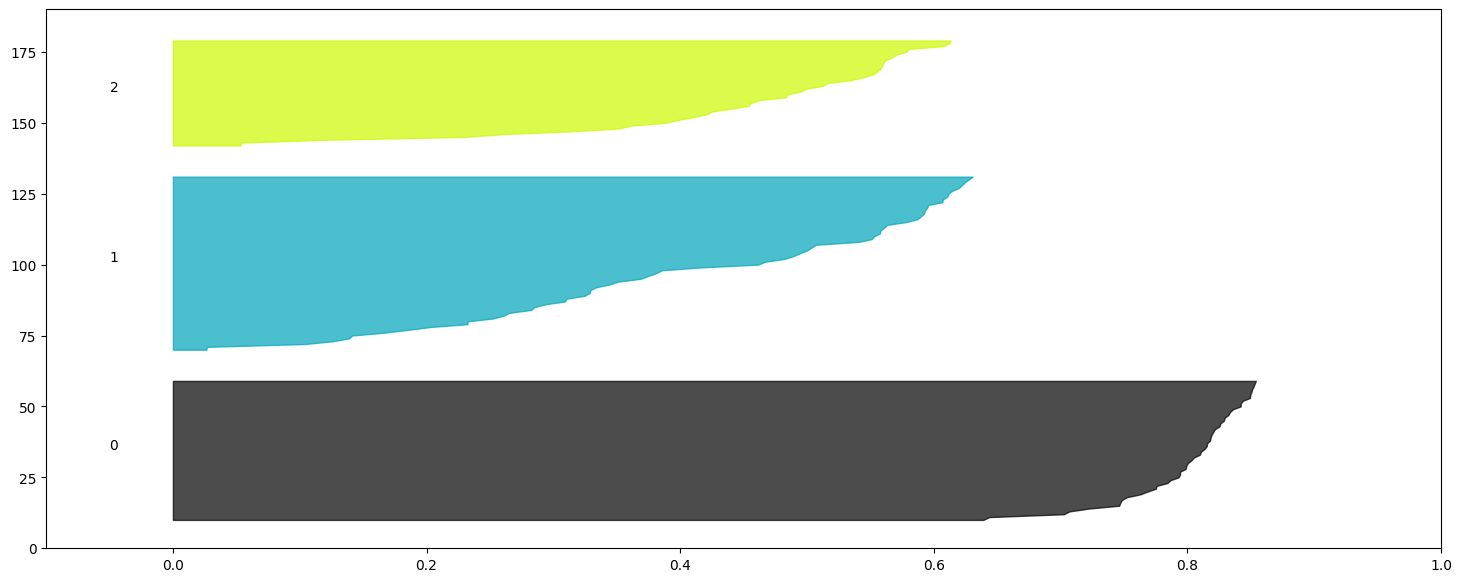

In [15]:
#visualizing the silhouette scores
import matplotlib.cm as cm


# plot the silhouette scores
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

# 1st subplot: silhouette plot
# minimum silhouette value is -0.1
# vertical line for average silhouette score of all the values
ax1.set_xlim([-0.1, 1])
# (n_clusters+1)*10 is for inserting blank space between silhouette plots
ax1.set_ylim([0, len(X) + (3 + 1) * 10])

y_lower = 10
for i in range(3):
    # aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # color for ith cluster
    color = cm.nipy_spectral(float(i) / 3)
    # fill the silhouette scores with a distinct color
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    # label ith cluster at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # compute new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples


# Paso 8  Visualizar los resultados del agrupamiento

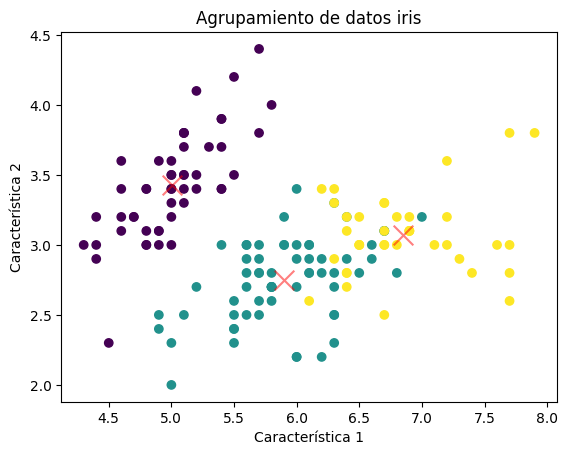

In [17]:
# plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x',  alpha=0.5, s=200)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Agrupamiento de datos iris')
plt.show()